# **Análisis contaminantes registrados**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
datosContaminantes = pd.read_csv("CSV_ unidos.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})
datosContaminantes = datosContaminantes.drop(["Minuto", "Segundo"], axis=1)
datosContaminantes

C:\Users\Administrador\AppData\Local\Temp\ipykernel_10008\2458259622.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  datosContaminantes = pd.read_csv("CSV_ unidos.csv", parse_dates={"Fecha":["Año", "Mes", "Día"]})


,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-01-01,0,-999.0,151,1,12,pm25
1,2012-01-01,1,-999.0,151,1,12,pm25
2,2012-01-01,2,-999.0,151,1,12,pm25
3,2012-01-01,3,-999.0,151,1,12,pm25
4,2012-01-01,4,-999.0,151,1,12,pm25
...,...,...,...,...,...,...,...
1744032,2022-07-31,19,10.6495,1,1,86,pm25
1744033,2022-07-31,20,9.4167,1,1,86,pm25
1744034,2022-07-31,21,15.2623,1,1,86,pm25
1744035,2022-07-31,22,16.4119,1,1,86,pm25


In [3]:
# Funcion para convertir valores str en float
def ToFloat(df):
    if isinstance(df, str):
        if df.count('.') == 2:
            return float( df.replace('.', '', 1) )
        else:
            return float(df)
    else:
        return float(df)

In [4]:
# Reemplazando valores en la columna a aplicar la funcion ToFloat
datosContaminantes["valor_contaminante"] = datosContaminantes["valor_contaminante"].apply(ToFloat)

Arreglamos los datos que presenten inconsistencias, ordenamos de menor a mayor por fechas y borramos columna de índice duplicada tras la última operación:

In [5]:
datosContaminantes = datosContaminantes[(datosContaminantes["valor_contaminante"] >= 0.0) & \
                                        (datosContaminantes["valor_contaminante"] != 999.0) & \
                                        (datosContaminantes["calidad_contaminante"] != 151)]
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
7956,2012-11-27,12,43.0000,1,1,12,pm25
7957,2012-11-27,13,22.0000,1,1,12,pm25
7958,2012-11-27,14,31.0000,1,1,12,pm25
7959,2012-11-27,15,29.0000,1,1,12,pm25
7960,2012-11-27,16,32.0000,1,1,12,pm25
...,...,...,...,...,...,...,...
1744032,2022-07-31,19,10.6495,1,1,86,pm25
1744033,2022-07-31,20,9.4167,1,1,86,pm25
1744034,2022-07-31,21,15.2623,1,1,86,pm25
1744035,2022-07-31,22,16.4119,1,1,86,pm25


In [6]:
datosContaminantes = datosContaminantes.sort_values(by=["Fecha", "Hora"]).reset_index().drop("index", axis=1)
datosContaminantes

,Fecha,Hora,valor_contaminante,calidad_contaminante,calidad,estacion,contaminante
0,2012-09-18,12,16.0000,1,1,25,pm25
1,2012-09-18,13,18.0000,1,1,25,pm25
2,2012-09-18,14,18.0000,1,1,25,pm25
3,2012-09-18,15,17.0000,1,1,25,pm25
4,2012-09-18,16,17.0000,1,1,25,pm25
...,...,...,...,...,...,...,...
1182154,2022-07-31,23,16.7007,1,1,80,pm25
1182155,2022-07-31,23,25.0298,1,1,83,pm25
1182156,2022-07-31,23,10.7323,1,1,84,pm25
1182157,2022-07-31,23,9.7255,1,1,85,pm25


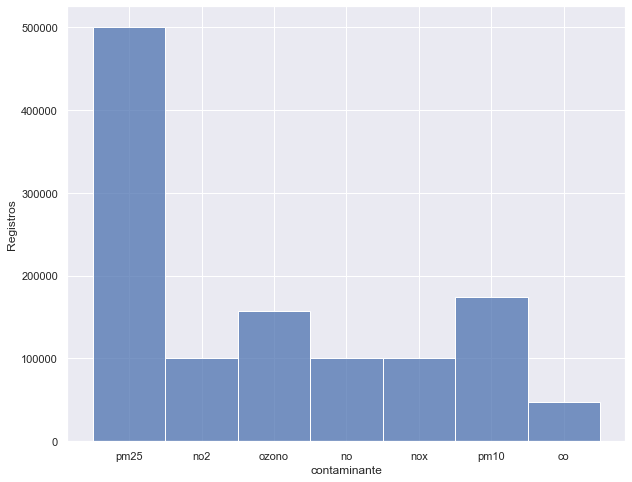

In [8]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('Registros')
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

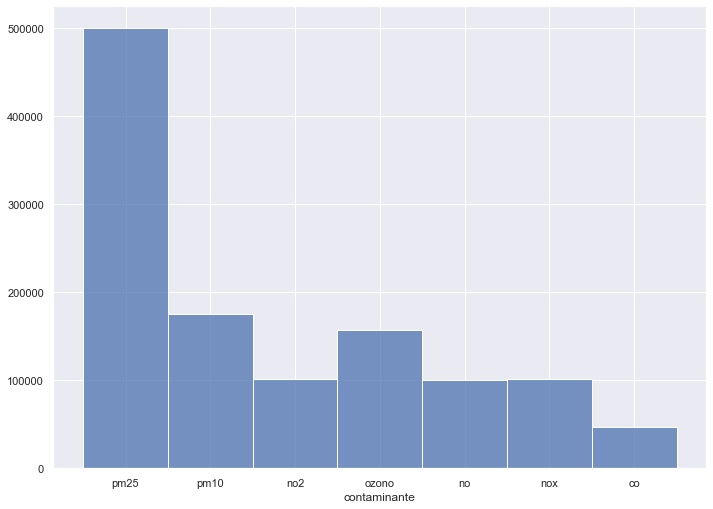

In [ ]:
sns.set_theme(style='dark')
sns.color_palette("dark:salmon_r", as_cmap=True)

sns.histplot(data=datosContaminantes, x="contaminante")

plt.ylabel('')
sns.set(rc={'figure.figsize':(10, 8)}); plt.grid(); plt.show()

In [53]:
datosContaminantes["estacion"].unique()

array([12, 25, 41, 43, 44, 46, 48,  6, 79, 80, 83, 84, 85, 86],
      dtype=int64)